# Introduction

A data consulting/ analytics company has asked us to develop a model to predict why high performing employees are leaving at a higher rate. This notebook will process the data given and the markdowns will explain what is happening and what insights can be drawn here.

# Data

## Imports

This section is simply used to import the libraries necessary to determine the model of the problem. As well as importing the dataset that Bob has provided us with.

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Feedback

When there are multiple imports from the same submodule, you can comma-separate your imports.

For example:

> from sklearn.metrics import confusion_matrix, classification_report

> from sklearn.feature_selection import SelectFromModel, RFE

In [0]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
hr_data=pd.read_csv('/content/Drive/My Drive/hr-data.csv',low_memory=False)

## Exploratory Data Analysis

Now that the data has been imported into the notebook, we will now be performing exploratory data analysis on it.

In [0]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales                  14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [0]:
hr_data.shape

(14999, 11)

The dataset contains 11 columns of variables listed above and has 14999 entries. The satisfaction_level and last_evaluation is a float variable, whereas sales and salary are object types. Everything else is integer type.

In [0]:
#sample of what the data looks like
hr_data

id  satisfaction_level  ...    sales  salary
0          0                0.38  ...    sales     low
1          1                0.80  ...    sales  medium
2          2                0.11  ...    sales  medium
3          3                0.72  ...    sales     low
4          4                0.37  ...    sales     low
...      ...                 ...  ...      ...     ...
14994  14994                0.40  ...  support     low
14995  14995                0.37  ...  support     low
14996  14996                0.37  ...  support     low
14997  14997                0.11  ...  support     low
14998  14998                0.37  ...  support     low

[14999 rows x 11 columns]

In [0]:
hr_data.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [0]:
hr_data.nunique()

id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
churn                        2
promotion_last_5years        2
sales                       10
salary                       3
dtype: int64

In [0]:
#types of variables
categorical_variables = [
    'number_project',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    'sales'
    'salary'
]

numerical_variables = [
    'satisfaction_level',
    'last_evaluation',
    'average_montly_hours'
]

target = ['churn']

There are no null values in the dataset. The columns has been sorted according to their variable types. Categorical and numerical data. The target data is the churn column for employees if the employee has left.

In [0]:
hr_data_dm=pd.get_dummies(hr_data, columns=['sales','salary'])
hr_data_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales_IT               14999 non-null  uint8  
 10  sales_RandD            14999 non-null  uint8  
 11  sales_accounting       14999 non-null  uint8  
 12  sales_hr               14999 non-null  uint8  
 13  sales_management       14999 non-null  uint8  
 14  sales_marketing        14999 non-null  uint8  
 15  sa

Create a new dataframe for dummy variables to be applied for sales and salary column.

In [0]:
#descriptive statistics of following columns
hr_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

satisfaction_level  ...  time_spend_company
count        14999.000000  ...        14999.000000
mean             0.612834  ...            3.498233
std              0.248631  ...            1.460136
min              0.090000  ...            2.000000
25%              0.440000  ...            3.000000
50%              0.640000  ...            3.000000
75%              0.820000  ...            4.000000
max              1.000000  ...           10.000000

[8 rows x 5 columns]

In [0]:
hr_data['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [0]:
hr_data['churn'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

The percentage in people churning from the Company is 23.8% with 3571. Whereas the ones who stayed are 76.2% with 11428. 

In [0]:
hr_data.groupby('churn').mean()

id  satisfaction_level  ...  Work_accident  promotion_last_5years
churn                                   ...                                      
0      7811.340742            0.666810  ...       0.175009               0.026251
1      6499.439653            0.440098  ...       0.047326               0.005321

[2 rows x 8 columns]

We grouped the data by churn and averaged the data and here are my observations:

- The average satisfaction level of the employees of the ones who did not churn are higher than the ones who did. 
- The number of times employees have been promoted in the last 5 years are higher than the ones who did. 
- The mean of average monthly hours are shorter for the ones who stayed compared to the ones who left but not by a lot.
- There are more work accidents for the ones who stayed.
- The average of last evaluation, number project and time spend company are very close to each other.

In [0]:
hr_data.groupby('sales').mean()

id  satisfaction_level  ...     churn  promotion_last_5years
sales                                         ...                                 
IT           7655.845966            0.618142  ...  0.222494               0.002445
RandD        6777.346887            0.619822  ...  0.153748               0.034307
accounting   7255.035202            0.582151  ...  0.265971               0.018253
hr           7035.889039            0.598809  ...  0.290934               0.020298
management   9438.363492            0.621349  ...  0.144444               0.109524
marketing    7750.684149            0.618601  ...  0.236597               0.050117
product_mng  8095.417960            0.619634  ...  0.219512               0.000000
sales        7675.873430            0.614447  ...  0.244928               0.024155
support      7211.809780            0.618300  ...  0.248991               0.008973
technical    7071.437132            0.607897  ...  0.256250               0.010294

[10 rows x 9 columns]

In [0]:
hr_data.groupby('salary').mean()

id  satisfaction_level  ...     churn  promotion_last_5years
salary                                   ...                                 
high    8621.897332            0.637470  ...  0.066289               0.058205
low     7326.897622            0.600753  ...  0.296884               0.009021
medium  7478.844400            0.621817  ...  0.204313               0.028079

[3 rows x 9 columns]

We also calulated categroical means for other sales and salary to get ma more detailed sense of our data.
- satisfaction_levels, last_evaluation, average_monthly_hours are very close to each other.
- promotion_last_5_years data varies in different groupings.

## Feedback

Very good thorough analysis using descriptive statistics and stratifying your numeric analysis with categorical groupings. A check of statistical significance might have helped to identify if there really is a signficant difference in means and categorical variables explored above.

### Data visualization

Here is a data visualization of the data. Every column that involves a 0 and 1 as its values means no and yes respectively.

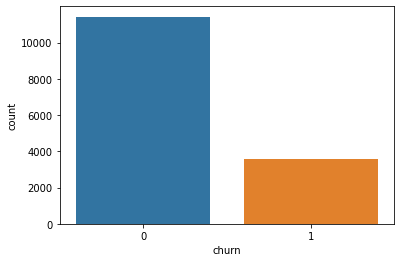

In [0]:
#bar plot of the churn count.
sb.countplot(x='churn',data=hr_data)
plt.show()

In [0]:
#function for bar plots of churn frequency for the categorical data 
def bar_graph(column):
  pd.crosstab(hr_data[column], hr_data['churn']).plot(kind='bar')
  plt.title('Churn type frequency for '+column)
  plt.xlabel(column)
  plt.ylabel('Fequency of Churns')
  return

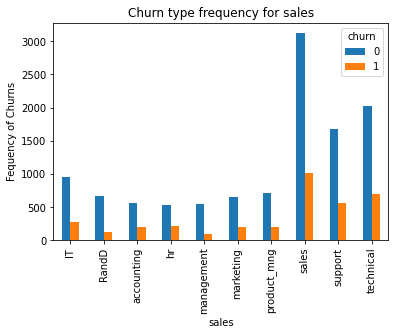

In [0]:
bar_graph('sales')

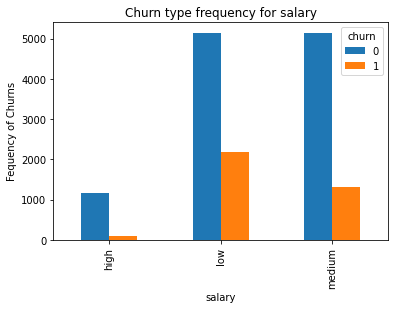

In [0]:
bar_graph('salary')

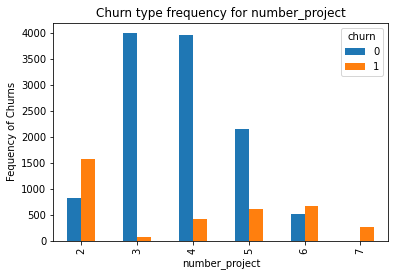

In [0]:
bar_graph('number_project')

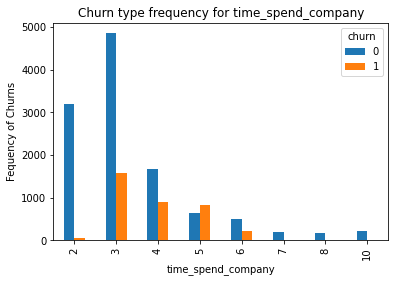

In [0]:
#time spent at the company by years
bar_graph('time_spend_company')

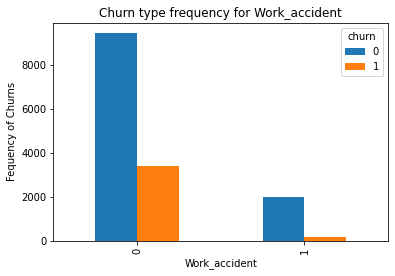

In [0]:
bar_graph('Work_accident')

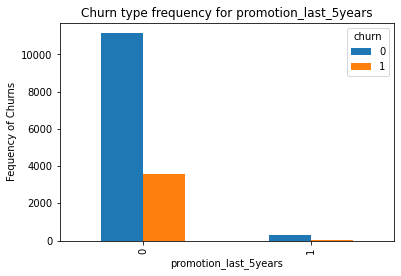

In [0]:
bar_graph('promotion_last_5years')

In all the bar charts above, the only time the yes churn exceeds the no is number_project 2. Raises question as to what's happening there.

## Feedback

Do you have any idea what might be happening in the situation where people people are churning more often if they only have two projects? What might be a real world guess as to what is happening? Where might you gather  additional data on this to describe this phenomenon?

In [0]:
#function for distribution plots for the numerical data and 3 box and whiskers plot of the column.
# The first box and whiskers plot represents all of the satisfaction_level
# The other 2 boxes are filtered by the churn type
def continous_graph(column):
  fig, axs = plt.subplots(2,2,figsize=(10,10))
  sb.distplot(hr_data.loc[hr_data['churn']==0,column],bins=10, label='0', ax=axs[0][0])
  sb.distplot(hr_data.loc[hr_data['churn']==1,column],bins=10, label='1',ax=axs[0][0])
  sb.boxplot(x=column, data=hr_data,ax=axs[0][1])
  sb.boxplot(x=column, data=hr_data.loc[hr_data['churn']==1, :],ax=axs[1][0])
  sb.boxplot(x=column, data=hr_data.loc[hr_data['churn']==0, :],ax=axs[1][1])
  return

## Feedback

This figure requires a lot more labelling and legends for each axis . Without the comments in this cell, I would not know what is going on. This can be achieve simply with:

> plt.legend()

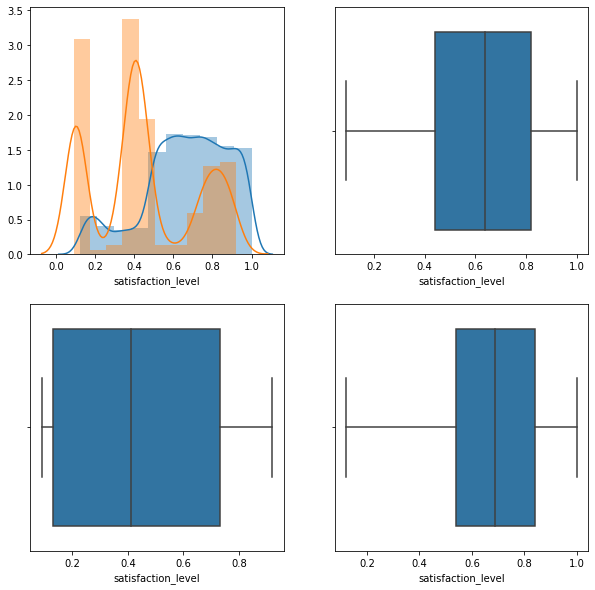

In [0]:
continous_graph('satisfaction_level')

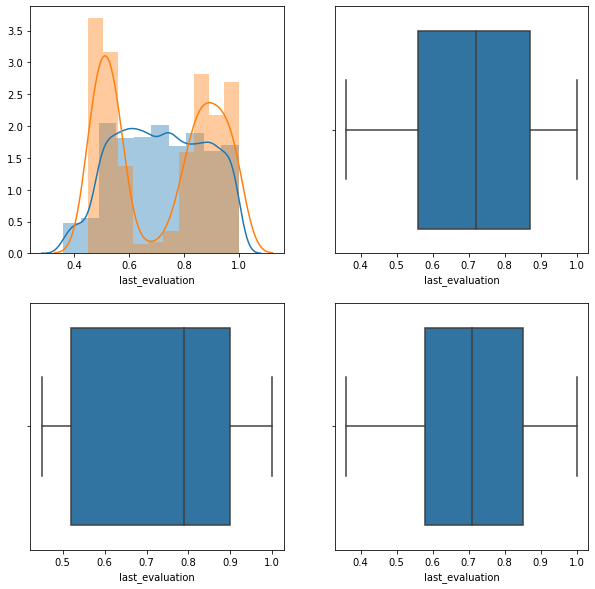

In [0]:
continous_graph('last_evaluation')

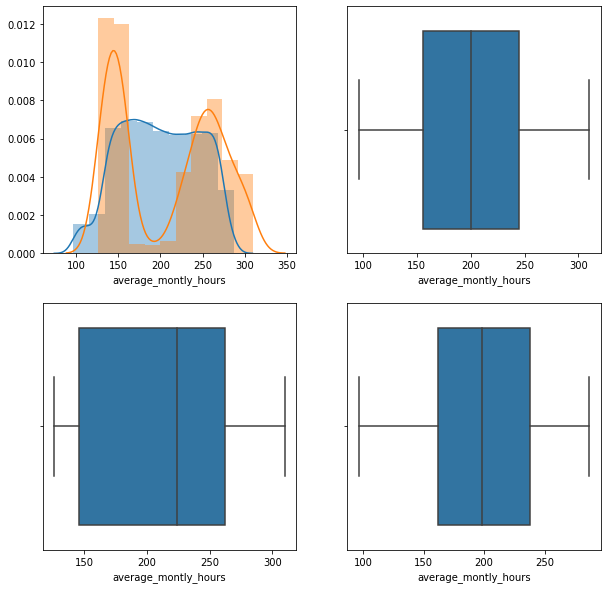

In [0]:
continous_graph('average_montly_hours')

In the multiple graphs of the continous data above, we can see that the ones who churns are more in the lower end of the graph where as the ones who stays are in the higher end of the respective spectrum. The interesting thing about these representation is that even though the some of the means calculated earlier grouped by churn, the ones who ones who left are split on both ends where as the ones who stayed are moreso groupbed together.

## Feedback

Good insight into the distribution of both class groupings. My feedback would only be to include only three axes (plots) per figure/numerical plot. This way we have two boxplots representing churn/no-churn side by side on the same plot.

Why might there be such a difference in the spread of values? What might be the reason for this in real life? Do any other variables have a bearing on this observed phenomenon?

## Modeling

Here we start modeling by taking the dataset with the created dummy variables and we perform features selection by splitting data into train and test size, 80% and 20%, scale the data, fit it into the Logistic Regression and look at the coefficient.

In [0]:
hr_data_dm.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [0]:
x_variables=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium']

## Feedback

If the number of variables that are to be excluded are shorter than the ones to be included, you can use the tilde operator (~) in to signify that you want these columns to be excluded from the selection of the variables that you want to be included.

For example:

> df[~excluded_variables]

In [0]:
x = hr_data_dm[x_variables]
y = hr_data_dm['churn']

In [0]:
#feature selection
logreg=LogisticRegression(penalty='none',solver='lbfgs',verbose=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [0]:
x_train.shape

(11999, 20)

In [0]:
logreg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
x_train_scaler=StandardScaler()

#fit scaler
x_train_scaler.fit(x_train)

#transform the data
x_train_scaled = x_train_scaler.transform(x_train)

In [0]:
logreg.fit(x_train_scaled,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
coef=logreg.coef_
coef

array([[-1.04201863,  0.11407237, -0.38544566,  0.25025097,  0.39304588,
        -0.53431387, -0.20692624, -0.02904122, -0.14010618,  0.01122554,
         0.06904565, -0.07918959,  0.02121624, -0.00450201,  0.00824295,
         0.02786085,  0.05296531, -0.41920111,  0.24135083, -0.01133905]])

In [0]:
x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

We'll use any coefficients greater than 0.10 on both negative and positive. So that leaves us with the following variables
- satisfaction_level
- last_evaluation
- number_project
- average_monthly_hours
- time_spend_company
- work_accident
- promotion_last_5years
- sales_RandD
- salary_high
- salary_low.

We go back plugging the data only this time with the ones the listed variables above and the different type of Logistic Regression.

In [0]:
x_variables_feature=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'salary_high',
       'salary_low']

In [0]:
x2=hr_data_dm[x_variables_feature]
y2=hr_data_dm['churn']

In [0]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [0]:
x2_train_scaler=StandardScaler()

#fit scaler
x2_train_scaler.fit(x2_train)

#transform the data
x2_train_scaled = x2_train_scaler.transform(x2_train)

In [0]:
# No Penalty
logreg2 = LogisticRegression(penalty='none',solver='lbfgs',verbose=1)

In [0]:
logreg2.fit(x2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
y2_pred = logreg2.predict(x2_test)
logreg2.score(x2_test, y2_test)

0.7856666666666666

In [0]:
logreg2.classes_

array([0, 1])

In [0]:
logreg2.predict_proba(x2_train)

array([[0.90912836, 0.09087164],
       [0.68806533, 0.31193467],
       [0.95814735, 0.04185265],
       ...,
       [0.89412331, 0.10587669],
       [0.75223744, 0.24776256],
       [0.83454597, 0.16545403]])

In [0]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.34      0.42       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.76      3000



In [0]:
confusion_matrix(y2_test,y2_pred)

array([[2120,  174],
       [ 469,  237]])

In [0]:
logreg3 = LogisticRegression(penalty='l1',solver='saga',verbose=1)
logreg4 = LogisticRegression(penalty='l2',solver='lbfgs',verbose=1)
logreg5 = LogisticRegression(penalty='elasticnet',class_weight='balanced',solver='saga',verbose=1)

In [0]:
#Logistic Regression with L1 Penalty
logreg3.fit(x2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
logreg3.score(x2_test, y2_test)

0.7606666666666667

In [0]:
logreg3.predict_proba(x2_train)

array([[0.75515919, 0.24484081],
       [0.69612505, 0.30387495],
       [0.83601629, 0.16398371],
       ...,
       [0.83415278, 0.16584722],
       [0.72255835, 0.27744165],
       [0.73052198, 0.26947802]])

In [0]:
y3_pred = logreg3.predict(x2_test)

In [0]:
print(classification_report(y2_test, y3_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



## Feedback

Any comment as to why we have no precision, recall and f1-score, but slightly better accuracy for this first model that uses L1-regularization and a SAGA solver? 

In [0]:
#Logistic Regression with L2 Penalty
logreg4.fit(x2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
logreg4.score(x2_test, y2_test)

0.7826666666666666

In [0]:
logreg4.predict_proba(x2_train)

array([[0.90938584, 0.09061416],
       [0.68725001, 0.31274999],
       [0.95759759, 0.04240241],
       ...,
       [0.89474049, 0.10525951],
       [0.75001119, 0.24998881],
       [0.83352128, 0.16647872]])

In [0]:
y4_pred = logreg4.predict(x2_test)

In [0]:
print(classification_report(y2_test, y4_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.32      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.64      3000
weighted avg       0.76      0.78      0.76      3000



There was an error trying to create a logistic regression with elasticnet as penalty.

## Feedback

This is because certain solvers only work with different penalties. The elastic net regularization is only compatible with the solver (try uniform weighting for class weights).

# Conclusions

After running the different types of regression models, with different types of penalty and solver, we can say that we can predict accurately around 78% percent accurately whether the employee will churn or not. The Variables that influence it are the following 
- satisfaction_level
- last_evaluation
- number_project
- average_monthly_hours
- time_spend_company
- work_accident
- promotion_last_5years
- sales_RandD
- salary_high
- salary_low.

The thing missing about this is the external factors that affect the employees decision. In the graph with the satisfactory, there are some who are pretty satisfied but left the company. 

# Overall Feedback

* Good use of markdown cells to explain your procecss
* Good analysis via data visualization and breaking down the variable distribution and exploring possible patterns
* There is a little bit lacking in the way of explaining the coefficients, results of the model (why it performs good in some metrics vs others)
* A side by side comparison of the model performance of each model-parameter configuration is necessary.
* I got some but not enough inquiry into the data, i.e., why might it be this way? what might explain this phenomenon I'm observing? If I don't have this information to explain this, what might be some sources that could possibly answer this.
* Would you recommend someone use your model to decide whether or not to implement a strategy to target employees who are predicted to churn?
* How does this compared with a model that simply predicting that someone does not churn?

Overall: Very good, but could use a little more on the real-world ramifications side.